In [3]:
#standardization is a process we aply eqiation or humara data ik scale mai agaye -1 sy 1 eg
#isky scale hoty
#standard scale -3 sy 3
# scaling to know range
#   1)0 sy 1 to min max scalar
#   2)-1 sy 1 min abs scalar
#upper waly linear

#note:scale krty hue dheko jo algouse krna woh negative value ko handle krskta? agar krskta tw standard  and min max use wrna abs min use

# Nonlinear transformer bhi hoty jo gussain distribution mai  convert krti
# data non parametric ho mtln normal na ho
#use qunatile transformer  yh isko uniform mai convert krde ga(uniform)
# mapping to gussain distri. 


#Normalization  is the process jis mai hum individual value use krty hain ismai individual ko unit norm krty .indiviual value choty form mai


Standard scaling is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x - μ) / σ

In [4]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [5]:
min_scalar=MinMaxScaler()

min_scaled=min_scalar.fit_transform(df)
min_scaled

min_scaled_df=pd.DataFrame(min_scaled,columns=df.columns)
min_scaled_df

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


In [6]:
scalar=StandardScaler()
# fit data on scalar

scaled_data=scalar.fit_transform(df)# yh fit kare ga mtlb calculation kare ga phir transform kare ga us calculation ki bina phr data ko
scaled_data#center 0 baki usky left right

#convet to df
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)

In [7]:
scaled_df

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [8]:
max_abs=MaxAbsScaler()

max_abs_scaled=max_abs.fit_transform(df)
max_abs_df=pd.DataFrame(max_abs_scaled,columns=df.columns)

max_abs_df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import RobustScaler#yh outlier ko bhi sclaed krta hai

robert=RobustScaler()

robert_scaled=robert.fit_transform(df)
robert_scaled_df=pd.DataFrame(robert_scaled,columns=df.columns)
robert_scaled_df

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


In [10]:
#Non linear transformation
#gussain ko normal convert krty hain
#1) box cox 2)yo jhonson 3)quantile

Transformation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

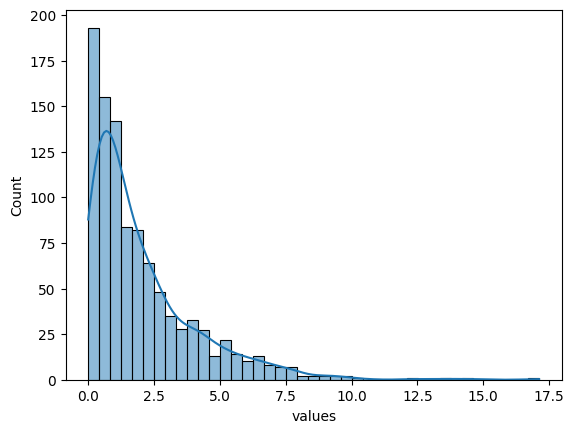

In [13]:
sns.histplot(df['values'],kde=True)

In [14]:
from sklearn.preprocessing import PowerTransformer

pt_boxcox=PowerTransformer(method='box-cox')#data should bhi positive for it ,standardize to False, which means you're not standardizing the data (i.e., you're not centering and scaling it to have mean 0 and standard deviation 1)
pt_yeo_jhonson=PowerTransformer(method='yeo-johnson')

df['box_cox']=pt_boxcox.fit_transform(df[['values']]+1)#1 plus so all values are positive and it take df not series
df['yeo_jhon']=pt_yeo_jhonson.fit_transform(df[['values']])

df.head()

,values,box_cox,yeo_jhon
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107


In [15]:
pt_boxcox_standard=PowerTransformer(method='box-cox',standardize=False)#data should bhi positive for it ,standardize to False, which means you're not standardizing the data (i.e., you're not centering and scaling it to have mean 0 and standard deviation 1)
pt_yeo_jhonson_standard=PowerTransformer(method='yeo-johnson',standardize=False)

df['box_cox_st']=pt_boxcox_standard.fit_transform(df[['values']]+1)#1 plus so all values are positive and it take df not series
df['yeo_jhon_st']=pt_yeo_jhonson_standard.fit_transform(df[['values']])

df.head()

,values,box_cox,yeo_jhon,box_cox_st,yeo_jhon_st
0,1.591749,0.179335,0.179335,0.787485,0.787485
1,2.511862,0.677331,0.677331,0.980233,0.980233
2,1.846446,0.339698,0.339698,0.849553,0.849553
3,1.574402,0.167607,0.167607,0.782945,0.782945
4,1.102097,-0.202107,-0.202107,0.639848,0.639848


In [16]:
from sklearn.preprocessing import QuantileTransformer
qt_normal=QuantileTransformer(output_distribution='normal')#ismai khud btaty distribution ka name

df['quantile']=qt_normal.fit_transform(df[['values']])

df.head()

,values,box_cox,yeo_jhon,box_cox_st,yeo_jhon_st,quantile
0,1.591749,0.179335,0.179335,0.787485,0.787485,0.162552
1,2.511862,0.677331,0.677331,0.980233,0.980233,0.587964
2,1.846446,0.339698,0.339698,0.849553,0.849553,0.286135
3,1.574402,0.167607,0.167607,0.782945,0.782945,0.157469
4,1.102097,-0.202107,-0.202107,0.639848,0.639848,-0.154930


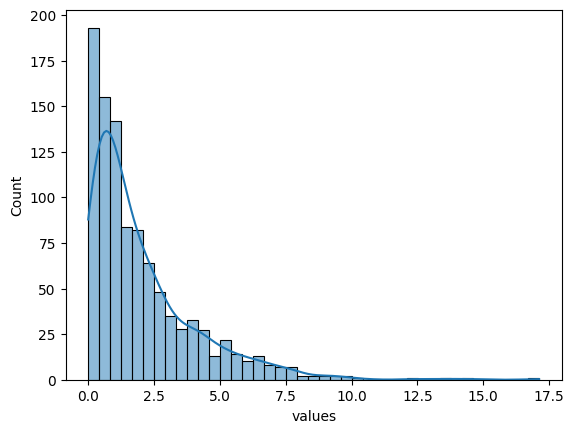

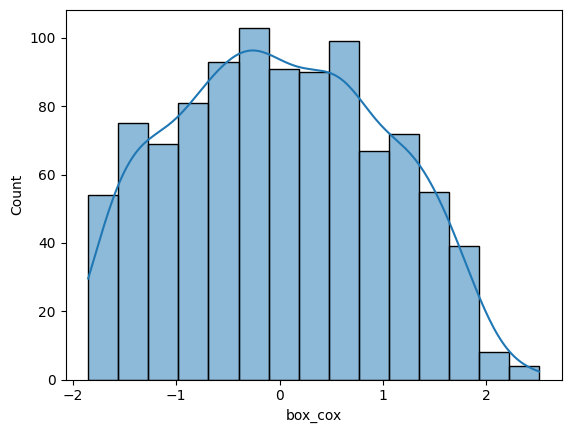

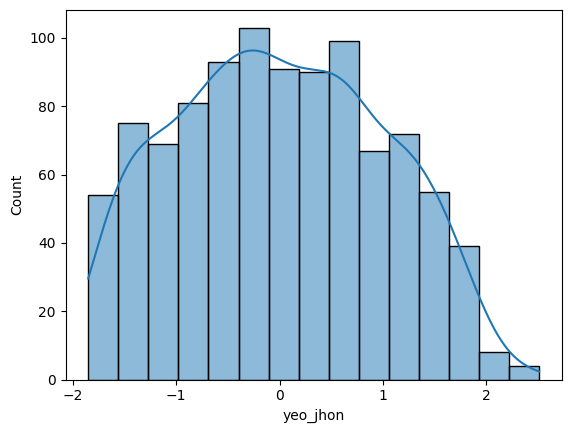

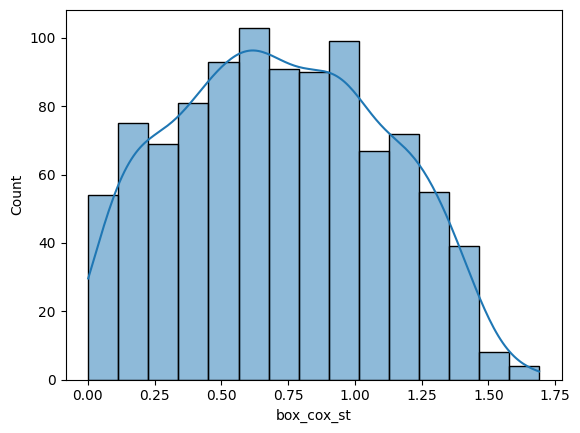

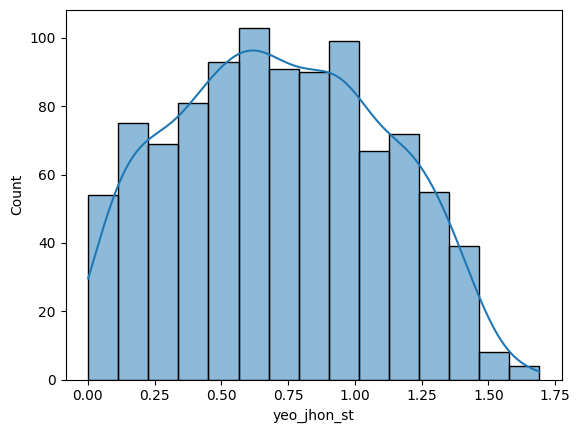

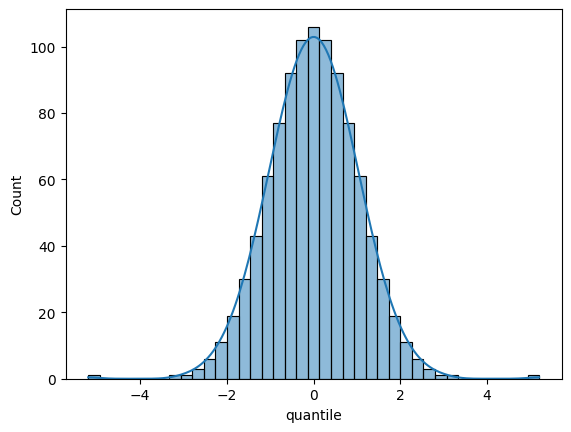

In [17]:
# creata hostograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col],kde=True)  
    plt.show()

L2 Normalization:
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [18]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normal=Normalizer(norm='l2') #l2 sum full row and take its sq.root
print(normal.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [19]:
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normal=Normalizer(norm='l1') #l1 sum of full row is one
print(normal.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


In [20]:
#More  types of Normalization
# 1)Z-score normalization
#       1)Standard Scalar
# 2)Min_Max Normalization 
#       2)Min_MaxScalar

# Scale ky sth kuch dafa normalization hojati hai literal meaning of normalization is changing individual value

#log transformation

In [21]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


<Axes: xlabel='Values', ylabel='Count'>

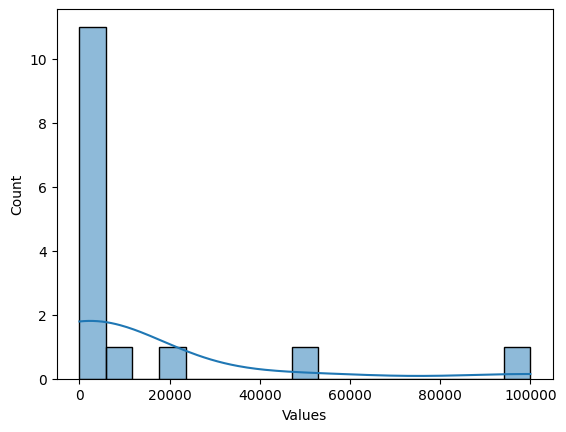

In [22]:
sns.histplot(df['Values'],kde=True)

In [23]:
df['log_values']=np.log(df['Values'])
df.head()

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023


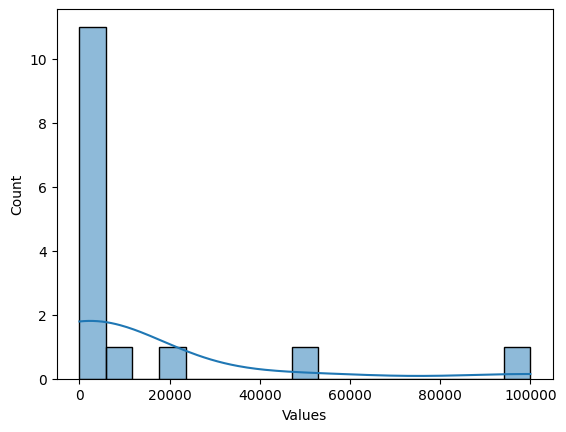

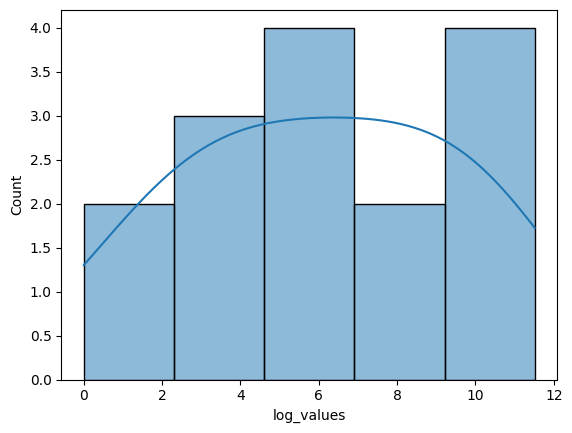

In [24]:
for col in df.columns:
    sns.histplot(df[col],kde=True)  
    plt.show()

In [ ]:
#scaling means scale change ho distribution ni yh use for scale sensitive algo such as svm and knn
#normalization changes scale as well as distribution eg random forest